# Mixing line example

## Draw a tephigram with points at 800 and 700 hPa

We want a mxing line between two points.  The lower point has a $\theta_e$ of 338 K
and a LCL of 860 hPa, and the upper point has  a $\theta_e$ of 332 K and an LCL of 700 hPa.  We want to
draw the lower point at 900 hPa and the upper point at 800 hPa.

Once we've got the mixing line, we can calculate the temperature and mixing ratio of any potential mixtures at any pressure.

In [1]:
## Blank tephigram

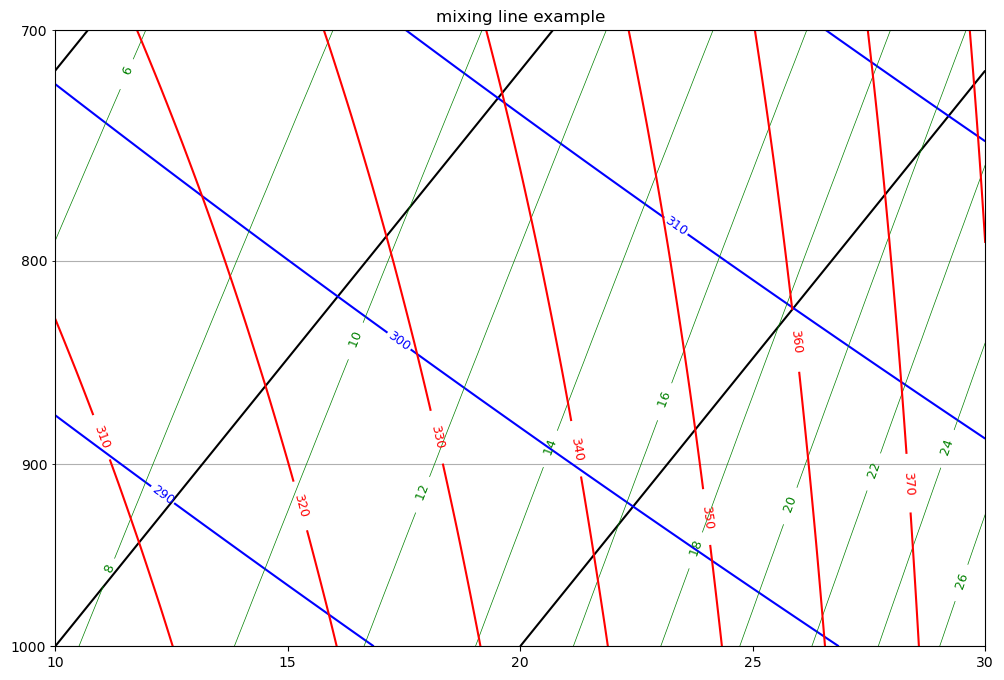

In [2]:
from a405.thermo.thermlib import (find_Tmoist,find_rsat,
                                  find_Td,tinvert_thetae,
                                  convertTempToSkew,find_lcl)
import a405.thermo.thermlib as tl
from a405.thermo.constants import constants as c
from matplotlib import pyplot as plt
import numpy as np
pa2hPa=1.e-2
from a405.skewT.fullskew import makeSkewWet
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax, skew = makeSkewWet(ax,corners=[10,30])
ax.set(ylim=[1000,700])
skewLimits = convertTempToSkew([10, 30], 1.e3, skew)
out=ax.set(xlim=skewLimits)
ax.set_title("mixing line example");

## Add mixing line points



### Find coords of lower point at its LCL

In [6]:

pa2hpa=1.e-2
kg2g = 1.e3
press=860.e2 #Pa  LCL
thetae_900=338.  #K
#
# thetae doesn't change between pressure levels
#
Temp_860=find_Tmoist(thetae_900,press)
rv_860=find_rsat(Temp_860,press)  #just saturated at the LCL
rv_900 = rv_860  #vapor is conserved
Tdew_860=Temp_860
print((f"temp,Tdew,rv at LCL press:  {press*pa2hpa:0.1f} hPa\n"),
      (f"Temp: {Temp_860- c.Tc:.1f} deg C\n" ),
      (f"Tdew: {Tdew_860 - c.Tc:.1f} deg C\n"),
      (f"rv: {rv_860*kg2g:.1f} g/kg"))

temp,Tdew,rv at LCL press:  860.0 hPa
 Temp: 15.9 deg C
 Tdew: 15.9 deg C
 rv: 13.3 g/kg


### Now bring it down a moist adiabat to 900 hPa

Add the temperature and dewpoint to the chart

temp,Tdew,rv at LCL press:  900.0 hPa
 Temp: 19.4 deg C
 Tdew: 16.6 deg C



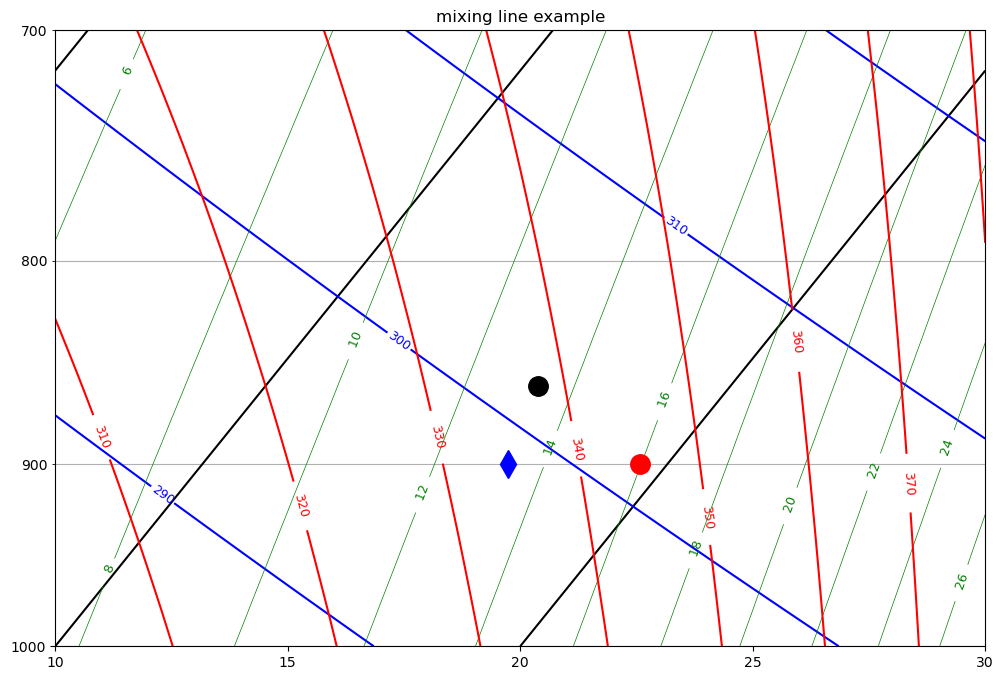

In [4]:
#
# now descend adiabatically to 900 hPa
#
press=900.e2
Temp_900,rv_900,rl_900=tinvert_thetae(thetae_900,rv_900,press)
Tdew_900=find_Td(rv_900,press)
print((f"temp,Tdew,rv at LCL press:  {press*pa2hpa:0.1f} hPa\n"),
      (f"Temp: {Temp_900- c.Tc:.1f} deg C\n" ),
      (f"Tdew: {Tdew_900 - c.Tc:.1f} deg C\n"))
#
#  draw these on the sounding at 900 hPa as a red circle and blue diamond
#
xplot=convertTempToSkew(Temp_900 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ro', markersize=14, markerfacecolor='r')
xplot=convertTempToSkew(Tdew_900 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'bd', markersize=14, markerfacecolor='b')
#
# add the LCL
#
press=860.e2
xplot=convertTempToSkew(Temp_860 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ko', markersize=14, markerfacecolor='k')
display(fig)

### Find coords of upper point at its LCL

LCL is 700 hPa and $\theta_e$ is 332 K

temp,Tdew,rv at LCL press:  700.0 hPa
 Temp: 5.8 deg C
 Tdew: 5.8 deg C
 rv: 8.3 g/kg

temp,Tdew,rv at LCL press:  800.0 hPa
 Temp: 16.2 deg C
 Tdew: 7.8 deg C



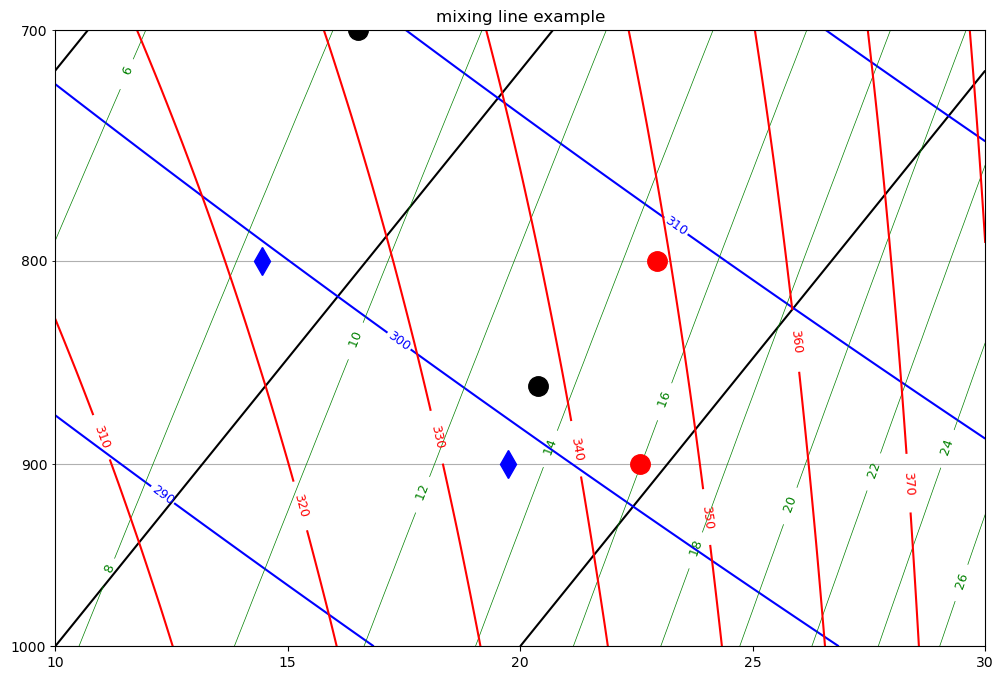

In [5]:
press=700.e2  #LCL Pa
thetae_800=332.  #K
Temp_700=find_Tmoist(thetae_800,press)
Tdew_700 = Temp_700
rv_700=find_rsat(Temp_700,press)
print((f"temp,Tdew,rv at LCL press:  {press*pa2hpa:0.1f} hPa\n"),
      (f"Temp: {Temp_700- c.Tc:.1f} deg C\n" ),
      (f"Tdew: {Tdew_700- c.Tc:.1f} deg C\n"),
      (f"rv: {rv_700*kg2g:.1f} g/kg\n"))
# get the temperature and dewpoint at 800 hPa
#
press=800.e2
rv_800=rv_700   #total water is conserved
Temp_800,rv_800,rl=tinvert_thetae(thetae_800,rv_800,press)
Tdew_800=find_Td(rv_800,press)
print((f"temp,Tdew,rv at LCL press:  {press*pa2hpa:0.1f} hPa\n"),
      (f"Temp: {Temp_800- c.Tc:.1f} deg C\n" ),
      (f"Tdew: {Tdew_800 - c.Tc:.1f} deg C\n"))
#
# put these points on the sounding at 800 hPa
#
xplot=convertTempToSkew(Temp_800 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ro', markersize=14, markerfacecolor='r')
xplot=convertTempToSkew(Tdew_800 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'bd', markersize=14, markerfacecolor='b')
press = 700e2
xplot=convertTempToSkew(Temp_700 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ko', markersize=14, markerfacecolor='k')
display(fig)
fig.savefig('mid-tephi.pdf')

## Question

Suppose air at 900 hPa lifts adiabatically to 800 hPa and mixes in 50% environment air.  What is the temperature and mixing ratio of that mixture at 800 hPa?  Is it saturated or unsaturated?